<a href="https://colab.research.google.com/github/sasansharee/Sasan_MMA_Assisgnments/blob/main/ML_Preprocess_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1: Load the breast_cancer dataset from skelarn (from sklearn.datasets import load_breast_cancer). Split the dataset into training and test datasets. Scale the dataset using minmaxscaler. Use KNeighborsClassifier classifier and report the score on the test dataset**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
df = load_breast_cancer()
df.keys()

In [ ]:
X = df.data
y = df.target

In [ ]:
np.unique(y, return_counts=True) # y needs to be stratified, there is a bit of imbalance

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
len(X_train) / len(X), len(X_test) / len(X) #checking for train_test splitting

In [ ]:
sum(y_train), sum(y_test), len(y_train), len(y_test)

In [ ]:
sum(y_train) / len(y_train), sum(y_test) / len(y_test) # checking for stratification

In [ ]:
scaler_1 = MinMaxScaler()
X_train_sc = scaler_1.fit_transform(X_train)
X_test_sc = scaler_1.transform(X_test)

In [ ]:
knn_1 = KNeighborsClassifier()
knn_1.fit(X_train, y_train)

In [ ]:
knn_1.score(X_test, y_test)

In [ ]:
knn_2 = KNeighborsClassifier()
knn_2.fit(X_train_sc, y_train)

In [ ]:
knn_2.score(X_test_sc, y_test)

**Step 2: Repeat Step 1 using pipelines and report the score**

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_1 = Pipeline([('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [ ]:
pipeline_1.fit(X_train, y_train)

In [ ]:
pipeline_1.score(X_test, y_test)

**Step 3: Use the pipeline object from Step 2 and make a grid search on parameter of number of neighbor**

In [ ]:
from sklearn.model_selection import GridSearchCV
my_param = {'knn__n_neighbors': np.arange(1, 30, 2)}
my_grid = GridSearchCV(pipeline_1, param_grid = my_param, cv = 10)

In [ ]:
my_grid.fit(X_train, y_train)

In [ ]:
my_grid.best_params_

In [ ]:
my_grid.best_score_

In [ ]:
my_grid.score(X_test, y_test)

**Step 4: Import bike_day_raw.csv. Create a pipeline using ColumnTransformer, Scaling, and KNeighborsRegressor**


**Use `from sklearn.neighbors import KNeighborsRegressor'
You need to split the data into X and y.
Check the data shape
Check the data types
Print the column names of the data frame**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [ ]:
bike = pd.read_csv('/content/bike_day_raw.csv')

In [ ]:
bike.info()

In [ ]:
bike.describe()

In [ ]:
bike.shape

In [ ]:
X = bike.drop('cnt', axis = 1)
y = bike['cnt']

In [780]:
X.shape, y.shape

((731, 10), (731,))

In [ ]:
np.unique(y, return_counts=True)

In [ ]:
X.columns

In [ ]:
bike.dtypes

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

**Create a scatterplot of each feature against the target variable (you may use clues our previous labs to do that**

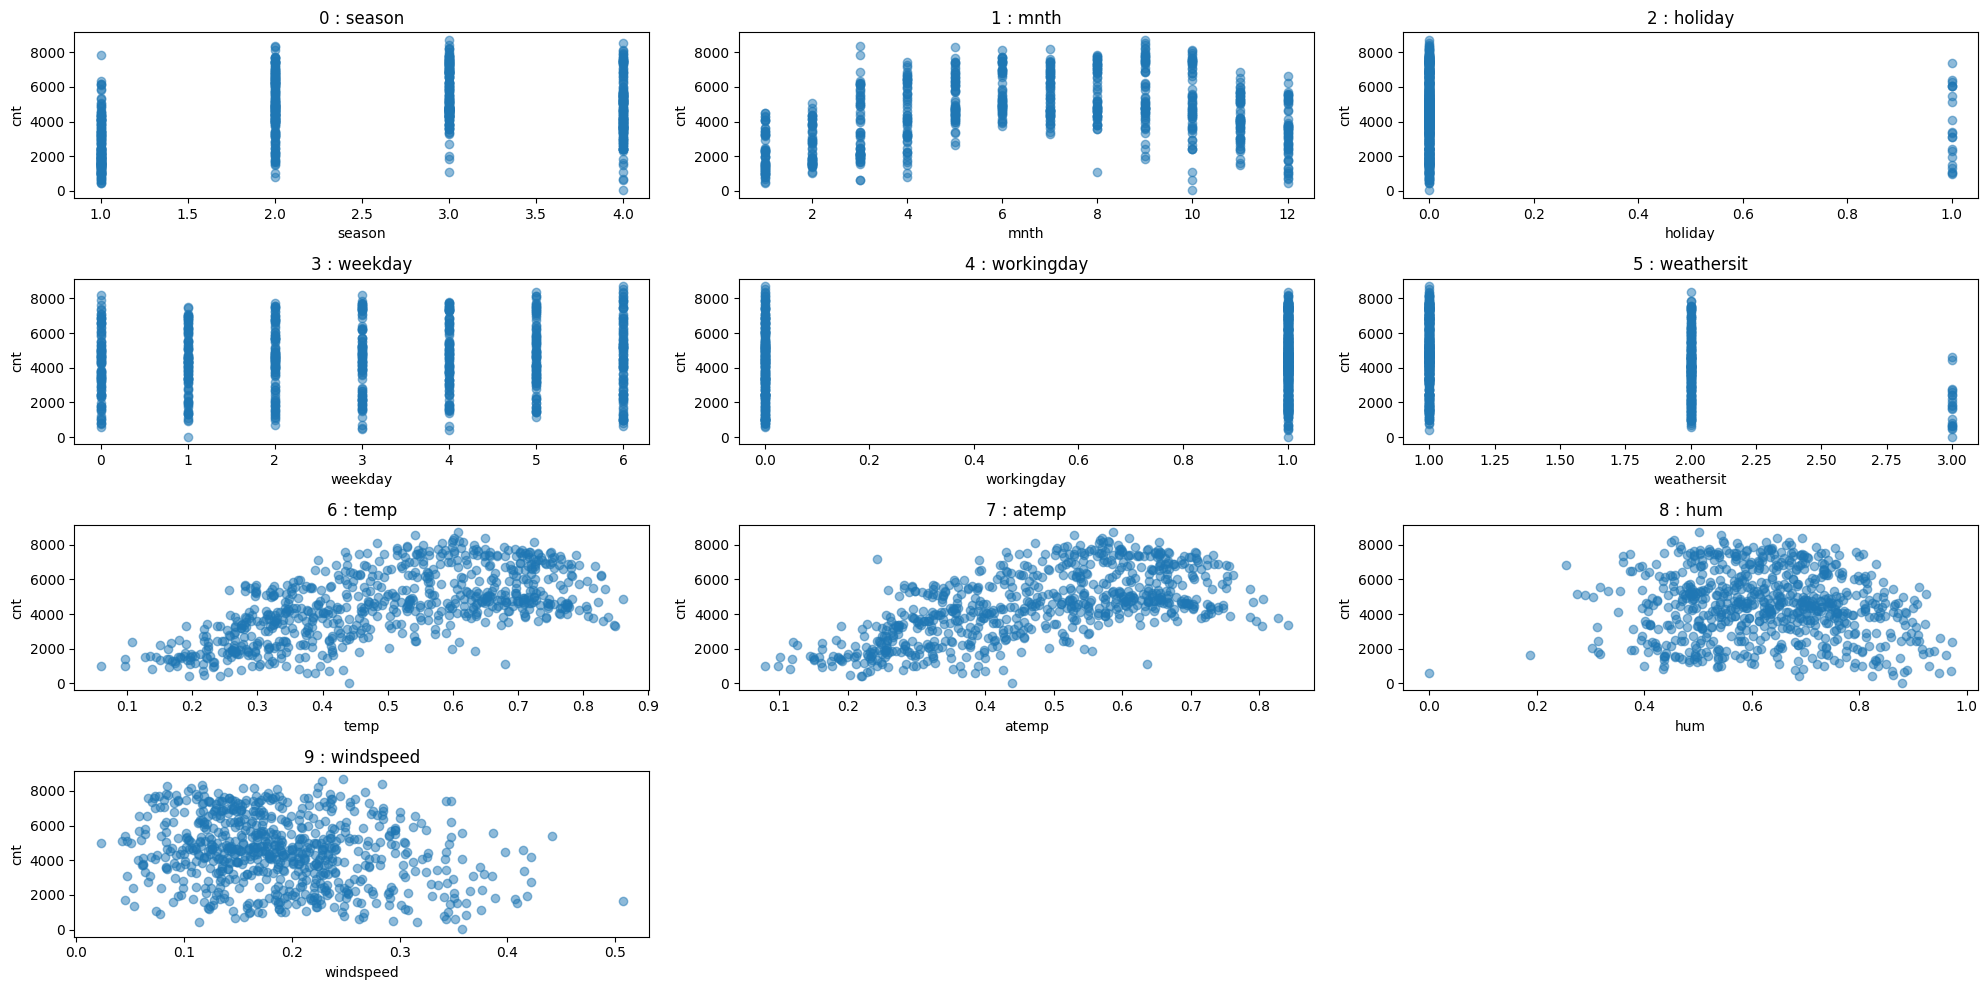

In [788]:
from os import set_blocking
fig, axes = plt.subplots(4, 3, figsize = (20, 10))
for i, ax in enumerate(axes.ravel()):
  if i > 9:
    ax.set_visible(False)
    continue
  ax.scatter(X.iloc[:, i], y, alpha = 0.5)
  ax.set_title(f'{i} : {X.columns[i]}')
  ax.set_ylabel('cnt')
  ax.set_xlabel(X.columns[i])

plt.tight_layout()
plt.show()

**Create alist of features that are numeric and not numeric**

In [790]:
X.dtypes

,0
season,int64
mnth,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,int64
temp,float64
atemp,float64
hum,float64
windspeed,float64


In [791]:
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

**Create a pipeline of imputer and standard scaler for the numeric features
Create a column transformer which uses the pipeline you created for numeric features and a onehotencoder for the non-numeric features
You can create your column transformer in different ways**

In [792]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [793]:
numeric_transformer = Pipeline(steps = [('imputer', SimpleImputer(strategy = 'median')), ('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown = 'ignore'))])

In [795]:
preprocessor = ColumnTransformer(transformers = [('num', numeric_transformer, numeric_features), ('cat', categorical_transformer, categorical_features)])

**Finally create a pipeline of column transformer and kNeighborsRegressor
Split your data into train and test datasets
Report the score on the test dataset**

In [796]:
from sklearn.neighbors import KNeighborsRegressor

In [797]:
my_reg = Pipeline(steps = [('prep', preprocessor), ('est', KNeighborsRegressor())])

In [ ]:
my_reg.fit(X_train, y_train)

In [799]:
my_reg.score(X_test, y_test)

0.586523318770447

In [800]:
from sklearn.model_selection import GridSearchCV

In [801]:
my_param = {'est__n_neighbors': np.arange(1, 30, 2)}
my_grid = GridSearchCV(my_reg, param_grid = my_param, cv = 10)

In [802]:
my_grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['temp',
                                                                          'atemp',
                                                                          'hum',
                                                                          'windspeed']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['season',
                                                                          'mnth',
                                                                          'holiday',
                                                                          'weekday',
                                                                          'workingday',
                                                                          'weathersit'])])),
                                       ('est', KNeighborsRegressor())]),
             param_grid={'est__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29])})

In [803]:
my_grid.best_params_

{'est__n_neighbors': np.int64(13)}

In [804]:
my_grid.best_score_

np.float64(0.5746470574062572)

In [805]:
my_grid.score(X_test, y_test)

0.6154989307744922